In [2]:
#@title imports
#%pip install requests-html    
#%pip install BeautifulSoup4

from bs4 import BeautifulSoup
import requests
import re
import pandas as pd
import numpy as np
from functools import reduce

import tensorflow as tf
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split

import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from functools import reduce
from sklearn.model_selection import cross_val_score


# Web Scaping

In [3]:
#@title Hit Req

# Downloading imdb top 50 movie's data per page 
def hitRequest (url):
  response = requests.get(url)
  soup = BeautifulSoup(response.text, "html.parser")
  return soup

In [11]:
#@title Find_all
def find_all(a_str, sub):
    start = 0
    while True:
        start = a_str.find(sub, start)
        if start == -1: 
          return
        yield start
        start += len(sub) # use start += 1 to find overlapping matches

In [12]:
#@title Scraping 
ind = 1
movie_name = []
movie_period = []
movie_type = []
movie_rating = []
movie_director = []
movie_gross = []
movie_vote = []
movie_order =[]
movie_year = []
movie_gross = []
page = 'https://www.imdb.com//search/title/?title_type=feature&num_votes=,&sort=num_votes,desc&start=51'
while (ind <= 17301):
  # if (ind == 17301 ):
  #   break

  print(ind)
  print (page)
  soup = hitRequest(page)
  ind +=50
  #df = getData(soup)
  movies = soup.find('div',{'class' :'redesign'})
  movies = movies.find('div' , {'class' : 'pagecontent'})
  movies = movies.find('div' , {'class' : 'redesign'})
  movies = movies.find('div' , {'id' : 'main'})
  movies = movies.find('div' , {'class' : 'article'})

  desc  = movies.find('div' , {'class' : 'desc'})
  descRef = desc.find('a' , {'class' : 'lister-page-next next-page'}).attrs['href']
  page = 'https://www.imdb.com/' + descRef

  
  movies = movies.find('div' , {'class' : 'lister list detail sub-list'})
  movies = movies.find('div' , {'class' : 'lister-list'})
  movies = movies.find_all('div' , {'class' : 'lister-item mode-advanced'})
  x = []
  x = [0]
  x[0] = 0
  for m in movies:
    movies = m.find('h3' , {'class' : 'lister-item-header'})
    movies_name = movies.find('a').text
    movie_name.append(movies_name)

    year = movies.find('span' , {'class' : 'lister-item-year text-muted unbold'}).text
    movie_year.append(year)

    order = movies.find('span' , {'class' : 'lister-item-index unbold text-primary'}).text
    movie_order.append(order)

    per = m.find('p' , {'class' : 'text-muted '})
    period = per.find('span' , {'class' : 'runtime'}).text
    movie_period.append(period)

    types = m.find('p' , {'class' : 'text-muted '})
    types = types.find('span' , {'class' : 'genre'}).text
    movie_type.append(types)  

    rating = m.find('div', {'class' : 'ratings-bar'})
    rating = rating.find('div', {'class' : 'inline-block ratings-imdb-rating'})
    movie_rating.append(rating.find('strong').text)

    #d = m.find('div' , {'class':'lister-item-content'})
    #director = d.find('p', {'class' : ""})
    #print (director)
    #director = director.find('a').text
    #movie_director.append(director) 
    

    vote = m.find('p' , {'class' : 'sort-num_votes-visible'})

    #print (vote)

    try:
      movie_vote.append(vote.find('span' , {'name' : 'nv'}).text)
    except:
      movie_vote.append ('0')

    #code to get gross 
    span = (list(find_all(str(vote), 'span')) )
    #print (len(span))
    if len(span) > 4:
      for ch in str(vote):
        if ch == '$':
          x = re.findall(('[\d]*\.[\d]*'), str(vote))
          movie_gross.append(x[0])
          print ('Movie : ' + movies_name + '🤗')
    else :
      if len(span) <=10 :
        x[0]= 0
        movie_gross.append(x[0])
        print ('Movie : ' + movies_name + '😢')
  #   if ind == 17301:
  #     break 
  # if (ind == 17031):
  #   break       
  #movie_gross.append(x[0])
  #pd.set_option('display.max_rows' , df.shape[0]+1)

Streaming output truncated to the last 5000 lines.
Movie : Dark Moon Rising😢
Movie : Vengeance😢
Movie : Lust och fägring stor😢
Movie : Monsieur Hire🤗
Movie : Dhol😢
Movie : In Too Deep🤗
Movie : Danger: Diabolik😢
Movie : James White🤗
12551
https://www.imdb.com//search/title/?title_type=feature&num_votes=,&sort=num_votes,desc&after=WzY3MTcsInR0NDI4ODYzNiIsMTI2MDFd
Movie : Eden Log😢
Movie : Causeway😢
Movie : The Scarlet Empress😢
Movie : The Infidel😢
Movie : Once a Thief😢
Movie : Natsamrat😢
Movie : Some Came Running😢
Movie : The Young Karl Marx🤗
Movie : 3 Generations🤗
Movie : Color Me Kubrick🤗
Movie : Crush😢
Movie : Bent😢
Movie : Communion🤗
Movie : Head Full of Honey😢
Movie : Twin Sisters🤗
Movie : Here Comes Mr. Jordan😢
Movie : Madhouse😢
Movie : Cahill U.S. Marshal😢
Movie : The Attorney🤗
Movie : Cha no aji😢
Movie : Billy Liar🤗
Movie : Mad Love🤗
Movie : The Entitled😢
Movie : Melissa P.😢
Movie : The Border🤗
Movie : After Lucia😢
Movie : Anonyma - Eine Frau in Berlin🤗
Movie : Deceiver🤗
Movie : 

In [13]:
#@title Fill th df
df = pd.DataFrame()
#pd.set_option('display.max_rows' , df.shape[0]+1)

df['Order'] = movie_order
df['Name'] = movie_name
df['Year'] = movie_year
df['Period'] = movie_period
df['Type'] = movie_type
df['Vote'] = movie_vote
df['Gross (M$)'] = movie_gross
df['Rating'] = movie_rating
df

,Order,Name,Year,Period,Type,Vote,Gross (M$),Rating
0,51.,The Lion King,(1994),88 min,"\nAnimation, Adventure, Drama","1,053,446",422.78,8.5
1,52.,Star Wars: Episode VI - Return of the Jedi,(1983),131 min,"\nAction, Adventure, Fantasy","1,050,176",309.13,8.3
2,53.,Finding Nemo,(2003),100 min,"\nAnimation, Adventure, Comedy","1,040,630",380.84,8.2
3,54.,Up,(2009),96 min,"\nAnimation, Adventure, Comedy","1,040,265",293.00,8.3
4,55.,Braveheart,(1995),178 min,"\nBiography, Drama, History","1,035,552",75.60,8.4
...,...,...,...,...,...,...,...,...
17344,"17,396.",Black Beauty,(2020),110 min,"\nDrama, Family","3,832",0,6.4
17345,"17,397.",Bonehill Road,(2017),84 min,"\nHorror, Thriller","3,832",0,4.6
17346,"17,398.",Cruel Peter,(2019),95 min,\nHorror,"3,832",0,4.7
17347,"17,399.",Arctic Blast,(2010),92 min,"\nAction, Adventure, Drama","3,832",0,3.9


In [14]:
#@title to csv
df.to_csv('Data.csv')

# Data Preprocessing 

In [3]:
#@title preprocessing imports

!pip install shap
from sklearn.model_selection import train_test_split
from sklearn import metrics
import shap
from sklearn.ensemble import RandomForestRegressor
#from sklearn.ensemble import RandomForestRegressor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
# reading csv file ---------------------------------------------
df = pd.read_csv('/content/Data.csv')

# drop unwanted coumns -----------------------------------------
df.drop('Unnamed: 0' , axis = 1  , inplace=True )

# clean Year column --------------------------------------------
def clean_year(year):
    year = str(year)
    x = re.findall('([\d]{4})', year)
    #print (x[0])
    return x[0]

df['Year'] = df['Year'].apply(clean_year)


# remove (min) from Period column
def clean_period(item):
    dop = str(item.loc['Period'])
    if dop == 'nan' or dop[0] == unwanted_characters:
        return np.NaN
    for character in unwanted_characters:
        if character in dop:
            character_index = dop.find(character)
            dop = dop[:character_index]
    return dop
unwanted_characters = [' min']
df['Period'] = df.apply(clean_period, axis = 1)

# clean type by removing unwanted characters then convert them to list
unwanted_characters = '\n'
def clean_Type(item):
  dop= str(item.loc['Type'])
  if (dop.startswith(unwanted_characters)):
    #dop = dop[:character_index]
    dop = dop.replace(unwanted_characters , '')
    return dop

df['Type'] = df.apply(clean_Type, axis = 1)
df['Type'] = df['Type'].astype(str)
def convert(string):
  string = string.replace(' ' ,'')
  li = list(string.split(", "))
  return li

df['Type'] = df['Type'].apply(convert)


# Cast columns to numeric ----------------------------------------
df['Year'] = pd.to_numeric(df['Year'])
df['Period'] = pd.to_numeric(df['Period'])
df['Vote']= df['Vote'].str.replace(',','')
df['Vote'] = pd.to_numeric(df['Vote'])
df['Order'] = df['Order'].str.replace('.','')
df['Order'] = df['Order'].str.replace(',','')
df['Order'] = pd.to_numeric(df['Order'])

df.drop (['Name'] , axis = 1 , inplace = True)
#df['Gross (M$)'] = df['Gross']
#df.drop('Gross' , axis = 1  , inplace=True )
df.head()

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.


,Order,Year,Period,Type,Vote,Gross (M$),Rating
0,51,1994,88,"[Animation,Adventure,Drama]",1053446,422.78,8.5
1,52,1983,131,"[Action,Adventure,Fantasy]",1050176,309.13,8.3
2,53,2003,100,"[Animation,Adventure,Comedy]",1040630,380.84,8.2
3,54,2009,96,"[Animation,Adventure,Comedy]",1040265,293.00,8.3
4,55,1995,178,"[Biography,Drama,History]",1035552,75.60,8.4


In [5]:
df['Type']

0         [Animation,Adventure,Drama]
1          [Action,Adventure,Fantasy]
2        [Animation,Adventure,Comedy]
3        [Animation,Adventure,Comedy]
4           [Biography,Drama,History]
                     ...             
17344                  [Drama,Family]
17345               [Horror,Thriller]
17346                        [Horror]
17347        [Action,Adventure,Drama]
17348                         [Drama]
Name: Type, Length: 17349, dtype: object

# ML

In [6]:
#categorical_cols = ['Type']
#df.drop('Order' , axis = 1 , inplace = True)
df['Type'] = df['Type'].apply(lambda x: ','.join(map(str, x)))
categorical_cols = ['Year','Period','Type','Vote','Gross (M$)']
df = pd.get_dummies(df, columns=categorical_cols)
X = df.drop(['Rating'], axis=1)
y = df['Rating'].values
X

,Order,Year_1915,Year_1916,Year_1919,Year_1920,Year_1921,Year_1922,Year_1923,Year_1924,Year_1925,...,Gross (M$)_504.01,Gross (M$)_515.2,Gross (M$)_532.18,Gross (M$)_543.64,Gross (M$)_608.58,Gross (M$)_620.18,Gross (M$)_652.27,Gross (M$)_700.06,Gross (M$)_804.75,Gross (M$)_936.66
0,51,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,52,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,53,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,54,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,55,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17344,17396,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17345,17397,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17346,17398,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17347,17399,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Shapley

In [8]:
#use shapley plots to explain black box algorithms

def shapley(x_train, y_train, x_test, row_number=0):

  # define the model to use
  model = LinearRegression(random_state=42).fit(x_train, y_train)

  # prediction using model 
  pred = model.predict(x_test)

  #define what row to apply SHAP to - what row of data to explain 
  row = x_test.iloc[[row_number]]

  explainer = shap.TreeExplainer(model)
  shap_values = explainer.shap_values(row)

  #featur names from datafram
  feature_names = row.colums 
  feature_values = row.values[0]
  #values = row.values[0]
  shaps = pd.array(shap_values[0], zip(feature_names, feature_values))

  # visulaizing the result of the shap values
  shap.initjs()
  return shap.force_plot(
      base_value = explainer.expected_value,
      shap_value = shap_values,
      features = row
  )

In [9]:
# Build the model with Random Forest Classifier :
model = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, n_estimators=10, random_state=0)

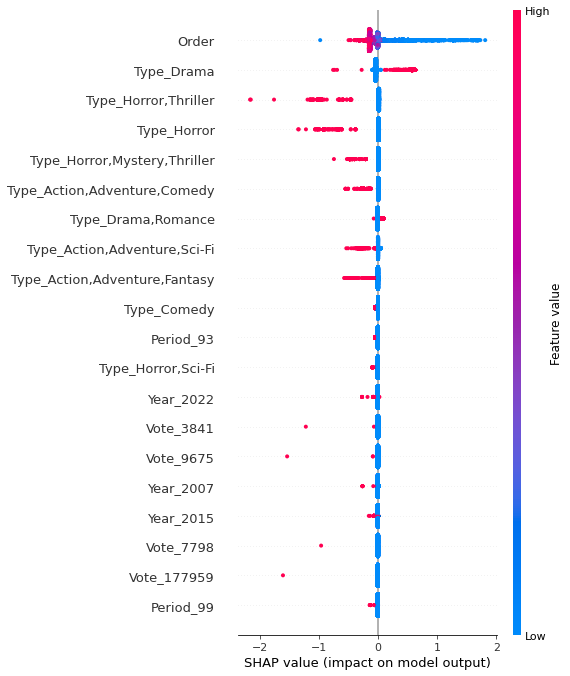

In [11]:
# explain the model's predictions using SHAP values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# summarize the effects of all the features
shap.summary_plot(shap_values, X, show=False)

In [18]:
df.loc[2:2 , 'Rating']

2    8.2
Name: Rating, dtype: float64

In [15]:
#explain the model's predictions using SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

# visualize the first prediction's explanation 
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])

In [13]:
# explain the model's predictions using SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

# visualize the 2 prediction's explanation 
shap.initjs()

#print (shap_values[2,:])
#print(X_train.iloc[2,:]) 

shap.force_plot(explainer.expected_value, shap_values[2,:], X_train.iloc[2,:])


In [14]:
# explain the model's predictions using SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

# visualize the 100 prediction's explanation 
shap.initjs()

shap.force_plot(explainer.expected_value, shap_values[100,:], X_train.iloc[100,:])

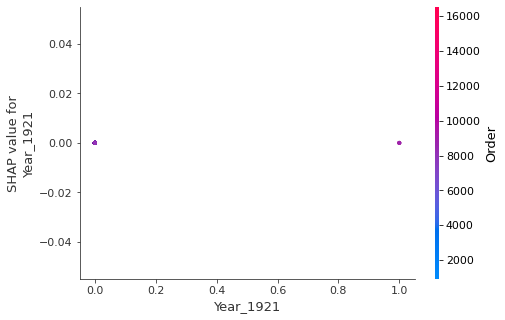

In [12]:
shap.dependence_plot(5, shap_values, X, show=False)

# Dont Run it, it will take time

In [ ]:

from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
predictions = reg.predict(X_test)

#zdcZC
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
#SCz
reg_rmse_scores = np.sqrt(-scores)

print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard deviation:", scores.std())